In [1]:
!pip install --upgrade langchain langchain-community langgraph  openai langchain-anthropic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.3/683.3 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.0/264.0 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 910.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 16.9 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.78.1
    Uninstalling openai-1.78.1:
      Successfully uninstalled openai-1.78.1


In [2]:
import os
os.environ["ANTHROPIC_API_KEY"]  = ""

In [3]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START
from langchain_anthropic import ChatAnthropic
import requests
from langchain_core.messages import SystemMessage, HumanMessage
from langgraph.graph import MessagesState

from langgraph.prebuilt import ToolNode, tools_condition

from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph.message import add_messages

In [4]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [5]:
!pip install -U duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.6 MB/s eta 0:00:00


In [6]:
from langchain_community.tools import DuckDuckGoSearchRun
search = DuckDuckGoSearchRun()
search.invoke("Obama's first name?")

"Obama's father, Barack Obama, Sr., was a teenage goatherd in rural Kenya, won a scholarship to study in the United States, and eventually became a senior economist in the Kenyan government.Obama's mother, S. Ann Dunham, grew up in Kansas, Texas, and Washington state before her family settled in Honolulu.In 1960 she and Barack Sr. met in a Russian language class at the University of Hawaii ... The White House, official residence of the president of the United States. The president of the United States is the head of state and head of government of the United States, [1] indirectly elected to a four-year term via the Electoral College. [2] Under the U.S. Constitution, the officeholder leads the executive branch of the federal government and is the commander-in-chief of the United ... First Generation: 1. Barack Hussein OBAMA was born on 4 August 1961 at the Kapiolani Maternity & Gynecological Hospital in Honolulu, Hawaii, to Barack Hussein OBAMA, Sr. of Nyangoma-Kogelo, Siaya District, 

In [7]:
from langchain_community.tools import DuckDuckGoSearchRun

def search_duckduckgo(query: str):
    """Searches DuckDuckGo using LangChain's DuckDuckGoSearchRun tool."""
    search = DuckDuckGoSearchRun()
    return search.invoke(query)

# Example usage
result = search_duckduckgo("what are AI agent")
print(result)

An AI agent is a software component that has the agency to act on behalf of a user or a system to perform tasks.Users can organize agents into systems that can orchestrate complex workflows, coordinate activities among multiple agents, apply logic to thorny problems, and evaluate answers to user queries. Intro to AI Agents and Use Cases: Link: Exploring Agentic Frameworks: Link: Understanding Agentic Design Patterns: Link: Tool Use Design Pattern: Link: Agentic RAG: Link: Building Trustworty AI Agents: Link: Planning Design Pattern: Link: Multi-Agent Design Pattern: Link: Metacognition Design Pattern: Link: AI Agents in Production: Link AI agents are not a passing trend. They are changing how businesses operate. Most business leaders waste time on tasks that should be automated, but AI agents handle those tasks so you can focus ... Limitations of AI Agents. AI agents have undoubtedly transformed many industries, but they come with limitations that impact their reliability, adaptability

In [8]:
def add(a:int , b:int)-> int:
  """ Adds a and b """
  return a+b

def multiply(a:int , b:int)-> int:
  """ multiply a and b """
  return a * b

In [9]:
from langchain_anthropic import ChatAnthropic
llm = ChatAnthropic(model='claude-3-7-sonnet-latest')

In [10]:
llm.invoke("Hii").content

"Hello! How can I assist you today? I'm here to help with any questions or tasks you might have."

In [11]:
tools = [search_duckduckgo, add, multiply]

llm_with_tools = llm.bind_tools(tools)

In [12]:
def chatbot(state: State):
  return {"messages": [llm_with_tools.invoke(state["messages"])]}


In [13]:
from langgraph.prebuilt import ToolNode, tools_condition

graph_builder = StateGraph(State)

# Define nodes
graph_builder.add_node("assistant",chatbot)
graph_builder.add_node("tools",ToolNode(tools))

# Define edges
graph_builder.add_edge(START,"assistant")
graph_builder.add_conditional_edges("assistant",tools_condition)
graph_builder.add_edge("tools","assistant")

react_graph = graph_builder.compile()

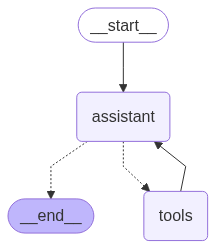

In [14]:
# To see the graph’s connection visually

display(Image(react_graph.get_graph().draw_mermaid_png()))

In [15]:
response = react_graph.invoke({"messages": [HumanMessage(content="what is the weather in delhi. Multiply it by 2 and add 5.")]})
print(response["messages"])

[HumanMessage(content='what is the weather in delhi. Multiply it by 2 and add 5.', additional_kwargs={}, response_metadata={}, id='ba37f3b3-2c2d-4ef7-81bb-159b8305e883'), AIMessage(content=[{'text': "I can help you with the multiplication and addition part of your request, but I don't have a direct tool to check the weather in Delhi. Let me search for the current weather information first, and then I can perform the mathematical operations you requested.", 'type': 'text'}, {'id': 'toolu_01Rp3iiwjq2YipQrHdo6gmPh', 'input': {'query': 'current temperature in Delhi India'}, 'name': 'search_duckduckgo', 'type': 'tool_use'}], additional_kwargs={}, response_metadata={'id': 'msg_016zsEV8vYxDa9CBEEGYQ9UL', 'model': 'claude-3-7-sonnet-latest', 'stop_reason': 'tool_use', 'stop_sequence': None, 'usage': {'cache_creation_input_tokens': 0, 'cache_read_input_tokens': 0, 'input_tokens': 541, 'output_tokens': 112, 'server_tool_use': None}, 'model_name': 'claude-3-7-sonnet-latest'}, id='run--63487cb9-c4

In [16]:
for m in response['messages']:
  m.pretty_print()

================================ Human Message =================================

what is the weather in delhi. Multiply it by 2 and add 5.
================================== Ai Message ==================================

[{'text': "I can help you with the multiplication and addition part of your request, but I don't have a direct tool to check the weather in Delhi. Let me search for the current weather information first, and then I can perform the mathematical operations you requested.", 'type': 'text'}, {'id': 'toolu_01Rp3iiwjq2YipQrHdo6gmPh', 'input': {'query': 'current temperature in Delhi India'}, 'name': 'search_duckduckgo', 'type': 'tool_use'}]
Tool Calls:
  search_duckduckgo (toolu_01Rp3iiwjq2YipQrHdo6gmPh)
 Call ID: toolu_01Rp3iiwjq2YipQrHdo6gmPh
  Args:
    query: current temperature in Delhi India
================================= Tool Message =================================
Name: search_duckduckgo

In New Delhi, at the moment, the city appears faded under a veil of light 